In [1]:
import cv2
import numpy as np
from cv2 import VideoWriter, VideoWriter_fourcc
from pdb import set_trace
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from pdb import set_trace

In [2]:
def GenerateData():
    width = 64
    height = 64
    seconds = 10
    radius = 1
    FPS=24
    paint_h = int(height/2)
    VideoData = []
    fourcc = VideoWriter_fourcc(*'MP42')
    video = VideoWriter('./data/circle_noise1.avi', fourcc, float(FPS), (width, height))

    #Design the testing data
    for paint_x in range(-radius, (width+radius+1), 1):
        frame = 255*np.ones((height, width), dtype=np.uint8)
        cv2.circle(frame, (paint_x, paint_h), radius, (0, 0, 0), -1)
        video.write(cv2.cvtColor(frame,cv2.COLOR_GRAY2BGR))
        VideoData.append(frame)
        
    video.release()

    VideoTrain = np.stack(VideoData, axis=0)

#     for paint_x in range(-radius, width+radius+1, 2):
#         frame = 255*np.ones( 
#                        (height, width), 
#                                   dtype=np.double)
#         cv2.circle(frame, (paint_x, paint_h), radius, (0, 0), -1)
#         VideoData.append(frame)

#     VideoTest = np.stack(VideoData, axis=0)

    return torch.tensor(VideoTrain,dtype=torch.float)

In [3]:
VideoTrain = GenerateData()
index = 50
print(VideoTrain.shape[0])
VideoIn = VideoTrain[:-1]
VideoOut = VideoTrain[1:]
print(VideoIn.shape[0])
print(VideoOut.shape[0])

67
66
66


In [18]:
#Define the architecture for the RNN
from pdb import set_trace
class RNN(nn.Module):
    def __init__(self, dt, height, width, frames):
        super(RNN, self).__init__()
        self.dt = dt
        self.height = height
        self.width = width
        self.W = nn.Parameter(255*torch.zeros(height, width))
        self.b = nn.Parameter(255*torch.zeros(height, width))
        self.frames = frames
        
    def forward(self,X, frames, flag):
        # Make the dynamics here
        # Extract the image of the object
        # Define the parameters for the new position
        # Predict the object there
        output = []
        output_prof = []
        inp = X[0]
        
        for i in range(frames):
            #Extract the indices of the object
            param = torch.matmul(self.W, inp) + self.b
            genframe = param + self.dt*param
            
            if(flag):
                proforce = torch.matmul(self.W, X) + self.b
                frame = proforce + self.dt*proforce
                output_prof.append(frame)
            
            if(i == frames-1):
                flag=False
                
            output.append(genframe)
            inp = genframe
            
        return torch.stack(output, axis=0), torch.stack(output_prof,axis=0)

In [19]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__(frames, height, width)
        self.W = nn.Parameter(255*torch.zeros(frames, height, width))
        self.b = nn.Parameter(255*torch.zeros(frames, height, width))
    def forward(self,X):
        for i in range(X.shape[0]):
            render = torch.matmul(self.W, X) + self.b
            output.append(render)
            
        return torch.stack(output, axis=0)

In [20]:
rnn = RNN(1/24, 64,64, 66)
optimizer = torch.optim.Adam(rnn.parameters(), lr=1e-5)
n_epochs = 100000
delay = 5
lossfn = nn.MSELoss()

In [25]:
for i in range(n_epochs):
    output, output_prof = rnn(VideoIn, 66, True)
    loss = lossfn(output, VideoOut) + lossfn(output_prof, VideoOut)
    if (i%delay == 0):
        print(loss.item())
    loss.backward()
    optimizer.step()

8806.8359375
1266.11767578125
12241.0419921875
24010.4296875
32898.5390625
39175.88671875
43637.14453125
46902.390625
49377.55859375
51318.8125


KeyboardInterrupt: 

(66, 64, 64)
[[[224.70221 228.26314 228.26314 ... 228.26314 228.26314 228.26314]
  [224.70221 228.26314 228.26314 ... 228.26314 228.26314 228.26314]
  [224.70221 228.26314 228.26314 ... 228.26314 228.26314 228.26314]
  ...
  [224.70221 228.26314 228.26314 ... 228.26314 228.26314 228.26314]
  [224.70221 228.26314 228.26314 ... 228.26314 228.26314 228.26314]
  [224.70221 228.26314 228.26314 ... 228.26314 228.26314 228.26314]]

 [[217.57317 224.70218 228.26314 ... 228.26314 228.26314 228.26314]
  [217.57317 224.70218 228.26314 ... 228.26314 228.26314 228.26314]
  [217.57317 224.70218 228.26314 ... 228.26314 228.26314 228.26314]
  ...
  [217.57317 224.70218 228.26314 ... 228.26314 228.26314 228.26314]
  [217.57317 224.70218 228.26314 ... 228.26314 228.26314 228.26314]
  [217.57317 224.70218 228.26314 ... 228.26314 228.26314 228.26314]]

 [[224.70221 217.57314 224.70218 ... 228.26314 228.26314 228.26314]
  [224.70221 217.57314 224.70218 ... 228.26314 228.26314 228.26314]
  [224.70221 217.57

TypeError: Invalid shape (66, 64, 64) for image data

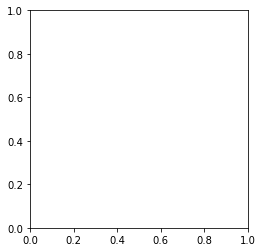

In [26]:
index=20
output, output_prof = rnn(VideoIn, 66, True)
print(output_prof.detach().numpy()[index].shape)
print(output_prof.detach().numpy()[index])
print(output_prof.shape)
plt.imshow(output_prof.detach().numpy()[index])
plt.show()
plt.imshow(VideoTrain.detach().numpy()[index])
plt.show()
print(VideoTrain.detach().numpy()[index])

In [155]:
print(list(rnn.parameters())[1].shape)

torch.Size([66, 64, 64])


In [158]:
height = 64
width = 64
fourcc = VideoWriter_fourcc(*'MP42')
video = VideoWriter('./data/project.avi', fourcc, float(24), (width, height))
output, output_prof = rnn(VideoIn, 66, True)
print(len(output))
for i in range(len(output)):   
    video.write(cv2.cvtColor((output_prof[i].detach().numpy()*255).astype(np.uint8),cv2.COLOR_GRAY2BGR))
video.release()

66


In [159]:
print(optimizer.param_groups[0]['params'])

[Parameter containing:
tensor([[[0.0139, 0.0139, 0.0139,  ..., 0.0139, 0.0139, 0.0139],
         [0.0139, 0.0139, 0.0139,  ..., 0.0139, 0.0139, 0.0139],
         [0.0139, 0.0139, 0.0139,  ..., 0.0139, 0.0139, 0.0139],
         ...,
         [0.0139, 0.0139, 0.0139,  ..., 0.0139, 0.0139, 0.0139],
         [0.0139, 0.0139, 0.0139,  ..., 0.0139, 0.0139, 0.0139],
         [0.0139, 0.0139, 0.0139,  ..., 0.0139, 0.0139, 0.0139]],

        [[0.0139, 0.0139, 0.0139,  ..., 0.0139, 0.0139, 0.0139],
         [0.0139, 0.0139, 0.0139,  ..., 0.0139, 0.0139, 0.0139],
         [0.0139, 0.0139, 0.0139,  ..., 0.0139, 0.0139, 0.0139],
         ...,
         [0.0139, 0.0139, 0.0139,  ..., 0.0139, 0.0139, 0.0139],
         [0.0139, 0.0139, 0.0139,  ..., 0.0139, 0.0139, 0.0139],
         [0.0139, 0.0139, 0.0139,  ..., 0.0139, 0.0139, 0.0139]],

        [[0.0133, 0.0133, 0.0133,  ..., 0.0133, 0.0133, 0.0133],
         [0.0133, 0.0133, 0.0133,  ..., 0.0133, 0.0133, 0.0133],
         [0.0133, 0.0133, 0.0133,  